<a href="https://colab.research.google.com/github/harrietgilmour/SIAM_FaIR/blob/main/SIAM_hindcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules that are needed.

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

# Observational data

In [ ]:
from google.colab import files
data_to_load = files.upload() #GCB2020v18_MtCO2_flat - GCB2020v18_MtCO2_flat.csv  (copy this into the file explorer to get it to work whenever it restarts and runs all)

Saving GCB2020v18_MtCO2_flat - GCB2020v18_MtCO2_flat.csv to GCB2020v18_MtCO2_flat - GCB2020v18_MtCO2_flat.csv


In [ ]:
import io
obs_data = pd.read_csv(io.BytesIO(data_to_load['GCB2020v18_MtCO2_flat - GCB2020v18_MtCO2_flat.csv']))

In [ ]:
obs_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61015,Global,WLD,2015,35209.44656,14624.45136,11914.68333,6762.248094,1428.375337,362.053077,117.635368,4.771059
61016,Global,WLD,2016,35220.41242,14364.38201,11969.32906,6939.907505,1463.584999,371.409053,111.799798,4.718691
61017,Global,WLD,2017,35696.34889,14413.36097,12174.82244,7114.554348,1476.475049,403.984248,113.151838,4.729334
61018,Global,WLD,2018,36419.71171,14618.29933,12253.08475,7489.099056,1514.612015,429.495561,115.121000,4.772543


In [ ]:
obs_global=obs_data[obs_data['Country'].isin(['Global'])]
obs_global

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
60750,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
60751,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
60752,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
60753,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
60754,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
61015,Global,WLD,2015,35209.446560,14624.451360,11914.68333,6762.248094,1428.375337,362.053077,117.635368,4.771059
61016,Global,WLD,2016,35220.412420,14364.382010,11969.32906,6939.907505,1463.584999,371.409053,111.799798,4.718691
61017,Global,WLD,2017,35696.348890,14413.360970,12174.82244,7114.554348,1476.475049,403.984248,113.151838,4.729334
61018,Global,WLD,2018,36419.711710,14618.299330,12253.08475,7489.099056,1514.612015,429.495561,115.121000,4.772543


In [ ]:
obs_global_years = obs_global[obs_global['Year']>1979]
obs_global_years

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
60980,Global,WLD,1980,19369.45179,7017.390392,8923.603635,2708.025616,403.946860,316.485283,NaN,4.344871
60981,Global,WLD,1981,18841.36658,6973.883651,8487.478746,2739.036246,403.665571,237.302361,NaN,4.152828
60982,Global,WLD,1982,18700.96497,7099.887268,8283.154152,2680.505522,401.621546,235.796482,NaN,4.050119
60983,Global,WLD,1983,18876.27456,7312.339734,8214.480412,2725.148408,411.161130,213.144874,NaN,4.016597
60984,Global,WLD,1984,19426.23405,7624.128249,8253.643534,2942.506069,418.837420,187.118779,NaN,4.060658
60985,Global,WLD,1985,20116.82422,8177.459774,8270.208248,3064.539505,422.730677,181.886017,NaN,4.129983
60986,Global,WLD,1986,20401.69470,8268.885202,8517.086148,3005.574829,439.965834,170.182688,NaN,4.112774
60987,Global,WLD,1987,21062.70396,8567.808309,8617.419628,3255.565822,458.358961,163.551243,NaN,4.168750
60988,Global,WLD,1988,21865.97075,8858.932732,8920.266235,3414.656922,485.930355,186.184507,NaN,4.249594
60989,Global,WLD,1989,22193.36178,8882.260975,9069.718662,3592.678208,497.250473,151.453463,NaN,4.237443


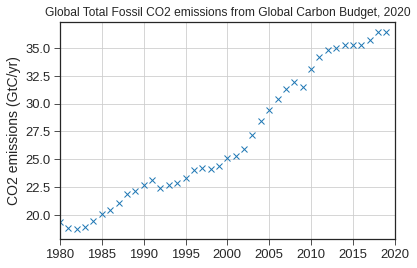

In [ ]:
plt.style.use('seaborn-ticks')

plt.tick_params(axis='both', which='major', labelsize=13)

plt.plot(obs_global_years['Year'],obs_global_years['Total']*0.001,'x') #*0.001 to convert from megatonnes to gigatonnes)
plt.ylabel('CO2 emissions (GtC/yr)',fontsize='14')
plt.title('Global Total Fossil CO2 emissions from Global Carbon Budget, 2020')
plt.xlim(1980,2020)
plt.grid()

# SIAM data (GD)

In [ ]:
#creating lists of all PARAMETERS
#================================

years = list(range(1982,2101)) #list of years from 1982-2100 (1980-81 need to be calculated separately from the loop)
K_1980 = 450 #1980 total capital value (T$)
A = 0.06 #Total factor productivity (%/yr) (6%/yr)
sensitivity_GWP = 0.7 #emissions sensitivity to GWP (unitless) - 0.7 * capital^0.6
emissions_GWP_ratio = 0.6 #ratio of emissions to GWP growth
land_change_emissions = 1.5 #land use change emissions (GtC/yr)
delta_u_1980 = 250 #1980 cumulative emissions (GtC)
clim_sens = (1.1/600) #climate sensitivity (^c/GtC)
base_decay = 0.03 #base decay rate of capital (%/yr) (3%/yr)
Sd = 0.0075 #decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)
#emissions_scale = 3.793 #total global CO2 emissions in 1980 / emissions_1980

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980 = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y = A*K #GWP in 1981 (T$/yr)
u = (0.7*y**0.6) #emissions rate in 1981 (GtC/yr)
delta_u = delta_u_1980+u+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t = clim_sens*delta_u #global mean surface temp change in 1981 (^C)
d = max(0.03,0.03+Sd*(delta_t-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate = (y-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series=[] #empty list for cumulative emissions
delta_u_full_series.append(delta_u_1980) #adding the 1980 value
delta_u_full_series.append(delta_u) #adding the 1981 value
print(delta_u_full_series)

#temperature change series:
delta_t_full_series=[]
delta_t_full_series.append(delta_t_1980)
delta_t_full_series.append(delta_t)
print(delta_t_full_series)

#total capital series:
K_full_series=[]
K_full_series.append(K_1980)
K_full_series.append(K)
print(K_full_series)

#emissions series:
u_full_series=[]
u_full_series.append(u_1980)
u_full_series.append(u)
print(u_full_series)

#capital decay rate series:
d_full_series=[]
d_full_series.append(d_1980)
d_full_series.append(d)
print(d_full_series)

#GWP series:
y_full_series=[]
y_full_series.append(y_1980)
y_full_series.append(y)
print(y_full_series)

#GWP growth rate series:
y_growth_rate_series=[]
y_growth_rate_series.append(0)
y_growth_rate_series.append(y_growth_rate)
print(y_growth_rate_series)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K = K+y-d*K
  y = A*K
  u = (0.7*y**0.6)
  delta_u = delta_u+u+land_change_emissions
  delta_t = clim_sens*delta_u
  d = max(0.03,0.03+Sd*(delta_t-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series.append(delta_u) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series.append(delta_t) #adding the temp change from 1982-2100
  K_full_series.append(K) #adding 1982-2100 total capital to the list
  u_full_series.append(u) #adding 1982-2100 emissions to the list
  d_full_series.append(d) #adding 1982-2100 capital decay rate to the list
  y_full_series.append(y) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df1=pd.DataFrame()

df1['Years']=years_full
df1['capital']=K_full_series
df1['GWP']=y_full_series
df1['emissions']=u_full_series
df1['cumulative_emissions']=delta_u_full_series
df1['temp_change']=delta_t_full_series
df1['decay_rate']=d_full_series
df1['total_GWP_growth_rate']=df1['GWP'].pct_change()

# Plot (combining observational & SIAM data)

Equation for observational regression: y=0.500005x+(-972.943817)
Equation for Model: y=0.474731x+(-922.224861)


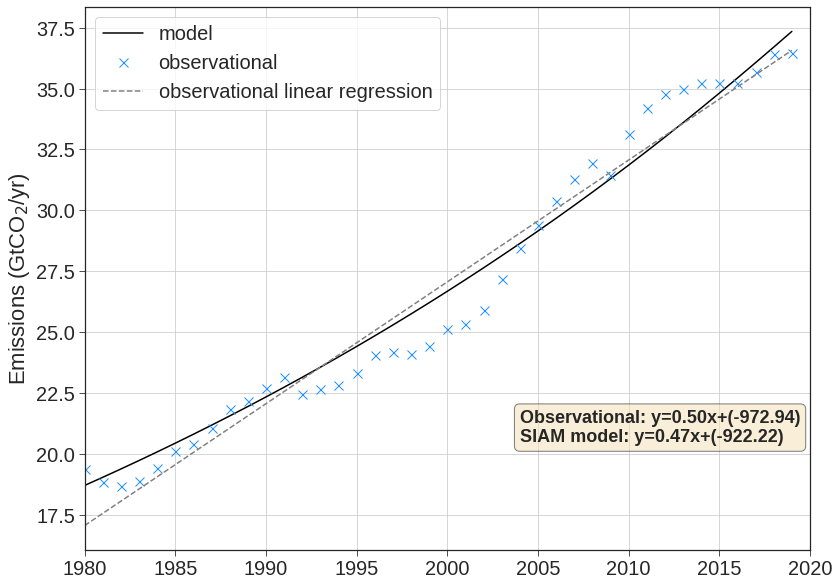

In [ ]:
fig = plt.figure(figsize=[13,10])
plt.plot(df1['Years'][:40],df1['emissions'][:40]*3.7,color='black',label='model') #model emissions 
plt.plot(obs_global_years['Year'],obs_global_years['Total']*0.001, 'x',label='observational',markersize=9,color='dodgerblue') # actual observational CO2 emissions (*0.001 to convert from megatonnes to gigatonnes)
#plt.title('Model vs. observational CO2 emissions',fontsize=22,weight='bold')
plt.ylabel('Emissions (GtCO$_2$/yr)',fontsize=22)
plt.grid()

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(1980,2020)

#linear regression for observational data
z = np.polyfit(obs_global_years['Year'],obs_global_years['Total']*0.001, 1)
p = np.poly1d(z)
plt.plot(obs_global_years['Year'],p(obs_global_years['Year']),"--",color='grey',label='observational linear regression')
print("Equation for observational regression: y=%.6fx+(%.6f)" %(z[0],z[1]))

#linear regression for model data
z1 = np.polyfit(df1['Years'][:40],df1['emissions'][:40]*3.7, 1)
p1 = np.poly1d(z1)
#plt.plot(df1['Years'][:40],p1(df1['emissions'][:40]),"--",color='black',label='linear regression')
print("Equation for Model: y=%.6fx+(%.6f)" %(z1[0],z1[1]))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    "Observational: y=%.2fx+(%.2f)" %(z[0],z[1]),
    "SIAM model: y=%.2fx+(%.2f)" %(z1[0],z1[1])))

plt.text(2004,20.5, textstr,fontsize=18, weight='bold',bbox=props)


plt.legend(loc='best',fontsize=20,frameon=True)

In [ ]:
import math

In [ ]:
y_actual = [obs_global_years['Total']*0.001]
y_predicted = [df1['emissions'][:40]*3.7]

MSE = np.square(np.subtract(y_actual,y_predicted)).mean()

RMSE = math.sqrt(MSE)
print('Root Mean Sqaure Error: \n')
print(RMSE)

Root Mean Sqaure Error: 

0.9923357901668899


In [ ]:
corr_matrix = np.corrcoef(y_actual,y_predicted)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.9753374180958208
